## Generating the Power Spectrum Function for the 3D Case

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
import random
import pandas as pd
import scipy.stats as stats
import seaborn as sns

%precision 2

'%.2f'

In [2]:
#Make a function to shift, transform, and shift back
def cosmo_transform(input_box):
    #Shifting the zero frequency component to the center
    shift_1 = np.fft.fftshift(input_box)
    
    #Fourier transform after the shift
    #Need to fourier transform here, shift does not transform alone
    transformed_box = np.fft.fftn(shift_1)
    
    #Shifting the zero-frequency component back to its assumed numpy original position
    shift_2 = np.fft.ifftshift(transformed_box)
    
    return shift_2


#Creating a function to generate the k_x frequency array
def kx_frequency_array(one_D_array):
    #Fourier transform to frequency space
    #Need to fourier transform here, shift does not transform alone
    #1D array containing the wavevectors 
    #By multiplying by the total # of pixels, we convert them to pixel freq.
    kfreq = np.fft.fftfreq(one_D_array)*2*np.pi
    
    #Shifting back to its assumed numpy position
    k_x = np.fft.fftshift(kfreq)
    
    return k_x


#Creating a function to generate the k_y frequency array
def ky_frequency_array(one_D_array):
    #Fourier transform to frequency space
    #Need to fourier transform here, shift does not transform alone
    #1D array containing the wavevectors 
    #By multiplying by the total # of pixels, we convert them to pixel freq.
    kfreq = np.fft.fftfreq(one_D_array)*2*np.pi
    
    #Shifting back to its assumed numpy position
    k_y = np.fft.fftshift(kfreq)
    
    return k_y


#Creating a function to generate the k_z frequency array
def kz_frequency_array(one_D_array):
    #Fourier transform to frequency space
    #Need to fourier transform here, shift does not transform alone
    #1D array containing the wavevectors 
    #By multiplying by the total # of pixels, we convert them to pixel freq.
    kfreq = np.fft.fftfreq(one_D_array)*2*np.pi
    
    #Shifting back to its assumed numpy position
    k_z = np.fft.fftshift(kfreq)
    
    return k_z


#Function to generate start and end binning arrays
def create_bins(max_bin_value, num_bins):
    #Defining the size of the bins
    bin_size = max_bin_value / num_bins
    #Defining the starting points of our array
    bin_starts = [bin_size * i for i in range(num_bins)]
    #Defining the ending points of our array
    bin_ends = [bin_size * (i+1) for i in range(num_bins)]
    return bin_starts, bin_ends


#Finding the element positions given our k parameters
#Changing find_element_positions to the 3D case
def find_element_positions(input_k, start, end):
    
    positions = []
    #Iterating through each element in the start and end arrays
    for k in range(len(start)):
        sub_positions = []
        #Iterating through first dimension of input_k
        for i in range(len(input_k)):
            #Iterating through second dimension of input_k
            for j in range(len(input_k[0])):
                #Iterating through third dimension of input_k
                for l in range(len(input_k[0][0])):
                    #For elements within our inputted desired range
                    if start[k] <= input_k[i][j][l] <= end[k]:
                        sub_positions.append((i, j, l))
        positions.append(sub_positions)
    
    #Return tuples that given the locations of the elements in the given range
    return positions


#Find corresponding (i,j,k) positions in Fourier transform array 
#Should be same dimensions as k array
def get_corresponding_values(input_k, fourier_array, start, end):
    #Calling function that returns position tuples
    positions = find_element_positions(input_k, start, end)
    
    #Empty list to store the values
    values = []
    
    #Iterate through rows in the positions array
    for pos_row in positions:
        #Initialize an empty list to store each row's values
        row_values = []
        #Iterate through triplets of indices in the row
        for i, j, k in pos_row:
            #Index into Fourier array and store value
            row_values.append(fourier_array[i][j][k])
            
        #Append values for this row into overall values list
        values.append(row_values)
    
    return values


#Finding averages of the values at each position
def avg_corresponding_values(input_k, fourier_array, start, end):
    
    #Get our corresponding values 2D array
    values = get_corresponding_values(input_k, fourier_array, start, end)
    
    #Creating empty avg_values array
    avg_values = []
    #Separating out ranges
    for row in values:
        row_sum = 0
        #For each value in the row
        for i in row:
            row_sum += i
        if len(row) == 0:
            avg = 0
        #Taking the average value for the row
        else:
            avg = row_sum/len(row)
            
        avg_values.append(avg)
    
    return avg_values


#Creating the power spectra plot
def power_spectra_plot(input_k, fourier_array, start, end, sigma):
    
    #Getting the average fourier value for the chosen k range
    avg_values = avg_corresponding_values(input_k, fourier_array, start, end)
    print(avg_values)
    #List of integers from our chosen range values
    #Will be the labels for the x-axis
    range_values = list(range(len(start)))
    
    F1 = plt.figure(figsize = (8,8))
    plt.style.use("fast")
    hfont = {'fontname':'Times New Roman'}
    plt.scatter(range_values, avg_values)
    
    #Labels
    plt.xlabel(r"k [$\mathregular{Mpc^{-1}}$]", size=25, **hfont) 
    plt.ylabel(r"$\mathregular{P(k) [mK^2]}$", size = 25, **hfont) 
    plt.suptitle("Power Spectrum from a 3D Box", size = 30, **hfont)

    #Tick Parameters
    plt.tick_params(bottom=True, top=True, left=True, right=True, which='major', 
                    direction = "in", labelsize=20, width=1.3, color='black')
    plt.tick_params(top= True, right = True, axis='both', which='minor', direction='in', 
                    labelsize = 20, length=5, width=1.3)
    plt.yticks(fontname = "Times New Roman") 
    plt.xticks(fontname = "Times New Roman")
    
    #Remaining Plot Specifications
    plt.errorbar(range_values, avg_values, yerr=sigma, fmt='o', color = 'black')
    plt.tight_layout()
    
    plt.show()

In [3]:
def generate_pk_3D (npix, num_bins, sigma):
    
    #Creating an array with npix dimensions
    toy_box = np.random.normal(size = (npix, npix, npix))
    
    #Fourier transforming box (shifts included)
    k_box = cosmo_transform(toy_box)
    
    #Squaring values to find amplitude array
    amplitude = np.abs(k_box)**2
    
    #Dividing by original volume of box
    Volume = (npix)**3
    
    #Getting the power spectra
    P_k = (amplitude/Volume)
    
    #Creating frequency arrays
    #THIS IS THE K_X ARRAY
    k_x = kx_frequency_array(npix)
    #THIS IS THE K_Y ARRAY
    k_y = ky_frequency_array(npix)
    #THIS IS THE K_Z ARRAY
    k_z = kz_frequency_array(npix)
    #Creating an array matching our toy box array
    kfreq3D = np.meshgrid(k_x, k_y, k_z, indexing="ij")
    
    #Normalisation factor
    #Finding distance between pixels
    k_values = np.sqrt(kfreq3D[0]**2 + kfreq3D[1]**2 + kfreq3D[2]**2)

    #Finding the maximum value of the k array
    max_k = np.max(k_values)
    
    #Defining the starting and ending arrays
    start, end = create_bins(max_k, num_bins)
    
    #Finding the element positions of the k-array using our given
    #k value ranges
    rings = find_element_positions(k_values, start, end)
    
    #Getting the corresponding fourier array values given positions
    co_values = get_corresponding_values(k_values, P_k, start, end)
    
    #Finding the average of all of these values at each index of 2D array
    averages = avg_corresponding_values(k_values, P_k, start, end)
   
    #Creating the power_spectra plot
    power_spectra_plot(k_values, P_k, start, end, sigma)
    
    return power_spectra_plot

[0.31560049507722, 1.5193749299460904, 1.109821569648163, 0.8043136908880301, 0.9819917706771878, 0.9762295209251038, 1.0646809542803466, 1.0718237403240878, 1.0323607558629784, 0.9242495006639357, 0.877071175515516, 0.5311663538241652]


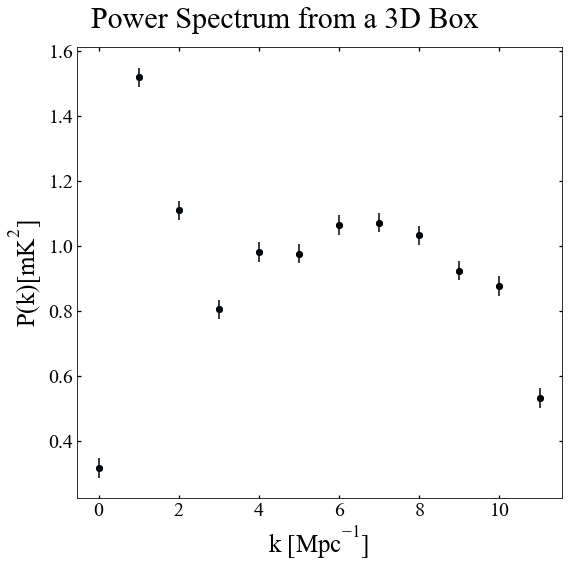

<function __main__.power_spectra_plot(input_k, fourier_array, start, end, sigma)>

In [4]:
generate_pk_3D(12, 12, 0.03)

## Testing 3D Case Step-By-Step 

In [5]:
npix = 4

#Creating an array with npix dimensions
toy_box = np.random.normal(size = (npix, npix, npix))
    
#Fourier transforming box (shifts included)
k_box = cosmo_transform(toy_box)
    
#Squaring values to find amplitude array
amplitude = np.abs(k_box)**2
    
#Dividing by original volume of box
Volume = (npix)**3

#Getting the power spectra
P_k = (amplitude/Volume)

In [6]:
P_k

array([[[4.06, 0.91, 0.82, 0.91],
        [0.93, 1.55, 3.72, 1.91],
        [1.28, 0.03, 2.07, 0.03],
        [0.93, 1.91, 3.72, 1.55]],

       [[1.  , 1.44, 0.64, 0.23],
        [1.05, 1.98, 0.93, 0.33],
        [0.59, 0.18, 0.58, 2.54],
        [1.91, 1.03, 0.59, 0.03]],

       [[1.  , 0.1 , 0.22, 0.1 ],
        [0.07, 0.62, 2.92, 1.34],
        [0.03, 3.21, 0.05, 3.21],
        [0.07, 1.34, 2.92, 0.62]],

       [[1.  , 0.23, 0.64, 1.44],
        [1.91, 0.03, 0.59, 1.03],
        [0.59, 2.54, 0.58, 0.18],
        [1.05, 0.33, 0.93, 1.98]]])

In [7]:
#Creating frequency arrays
#THIS IS THE K_X ARRAY
k_x = kx_frequency_array(4)
#THIS IS THE K_Y ARRAY
k_y = ky_frequency_array(4)
#THIS IS THE K_Z ARRAY
k_z = kz_frequency_array(4)
#Creating an array matching our toy box array
kfreq3D = np.meshgrid(k_x, k_y, k_z, indexing="ij")

In [8]:
print(kfreq3D)

[array([[[-3.14, -3.14, -3.14, -3.14],
        [-3.14, -3.14, -3.14, -3.14],
        [-3.14, -3.14, -3.14, -3.14],
        [-3.14, -3.14, -3.14, -3.14]],

       [[-1.57, -1.57, -1.57, -1.57],
        [-1.57, -1.57, -1.57, -1.57],
        [-1.57, -1.57, -1.57, -1.57],
        [-1.57, -1.57, -1.57, -1.57]],

       [[ 0.  ,  0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ,  0.  ]],

       [[ 1.57,  1.57,  1.57,  1.57],
        [ 1.57,  1.57,  1.57,  1.57],
        [ 1.57,  1.57,  1.57,  1.57],
        [ 1.57,  1.57,  1.57,  1.57]]]), array([[[-3.14, -3.14, -3.14, -3.14],
        [-1.57, -1.57, -1.57, -1.57],
        [ 0.  ,  0.  ,  0.  ,  0.  ],
        [ 1.57,  1.57,  1.57,  1.57]],

       [[-3.14, -3.14, -3.14, -3.14],
        [-1.57, -1.57, -1.57, -1.57],
        [ 0.  ,  0.  ,  0.  ,  0.  ],
        [ 1.57,  1.57,  1.57,  1.57]],

       [[-3.14, -3.14, -3.14, -3.14],
        [-1.57, -1.57, -1.57, -1.57]

In [9]:
k_values = np.sqrt(kfreq3D[0]**2 + kfreq3D[1]**2 + kfreq3D[2]**2)

In [10]:
print(k_values)

[[[5.44 4.71 4.44 4.71]
  [4.71 3.85 3.51 3.85]
  [4.44 3.51 3.14 3.51]
  [4.71 3.85 3.51 3.85]]

 [[4.71 3.85 3.51 3.85]
  [3.85 2.72 2.22 2.72]
  [3.51 2.22 1.57 2.22]
  [3.85 2.72 2.22 2.72]]

 [[4.44 3.51 3.14 3.51]
  [3.51 2.22 1.57 2.22]
  [3.14 1.57 0.   1.57]
  [3.51 2.22 1.57 2.22]]

 [[4.71 3.85 3.51 3.85]
  [3.85 2.72 2.22 2.72]
  [3.51 2.22 1.57 2.22]
  [3.85 2.72 2.22 2.72]]]


In [11]:
max_k = np.max(k_values)
print(max_k)
    
start, end = create_bins(max_k, 4)

5.441398092702653


In [12]:
start

[0.0, 1.3603495231756633, 2.7206990463513265, 4.08104856952699]

In [13]:
end

[1.3603495231756633, 2.7206990463513265, 4.08104856952699, 5.441398092702653]

In [14]:
rings = find_element_positions(k_values, start, end)
print(rings)

[[(2, 2, 2)], [(1, 1, 1), (1, 1, 2), (1, 1, 3), (1, 2, 1), (1, 2, 2), (1, 2, 3), (1, 3, 1), (1, 3, 2), (1, 3, 3), (2, 1, 1), (2, 1, 2), (2, 1, 3), (2, 2, 1), (2, 2, 3), (2, 3, 1), (2, 3, 2), (2, 3, 3), (3, 1, 1), (3, 1, 2), (3, 1, 3), (3, 2, 1), (3, 2, 2), (3, 2, 3), (3, 3, 1), (3, 3, 2), (3, 3, 3)], [(0, 1, 1), (0, 1, 2), (0, 1, 3), (0, 2, 1), (0, 2, 2), (0, 2, 3), (0, 3, 1), (0, 3, 2), (0, 3, 3), (1, 0, 1), (1, 0, 2), (1, 0, 3), (1, 1, 0), (1, 1, 1), (1, 1, 3), (1, 2, 0), (1, 3, 0), (1, 3, 1), (1, 3, 3), (2, 0, 1), (2, 0, 2), (2, 0, 3), (2, 1, 0), (2, 2, 0), (2, 3, 0), (3, 0, 1), (3, 0, 2), (3, 0, 3), (3, 1, 0), (3, 1, 1), (3, 1, 3), (3, 2, 0), (3, 3, 0), (3, 3, 1), (3, 3, 3)], [(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 0, 3), (0, 1, 0), (0, 2, 0), (0, 3, 0), (1, 0, 0), (2, 0, 0), (3, 0, 0)]]


In [15]:
co_values = get_corresponding_values(k_values, P_k, start, end)

In [16]:
print(co_values)

[[0.05498622409435979], [1.9778664463924354, 0.9335750929509479, 0.3348557254420756, 0.18195527314957202, 0.5824933925345337, 2.5358704848784654, 1.0304456899726397, 0.5923138028020543, 0.034742643919382914, 0.6162747114634124, 2.9249667913127335, 1.344143674829139, 3.2107430418682097, 3.2107430418682097, 1.344143674829139, 2.9249667913127335, 0.6162747114634124, 0.034742643919382914, 0.5923138028020543, 1.0304456899726397, 2.5358704848784654, 0.5824933925345337, 0.18195527314957202, 0.3348557254420756, 0.9335750929509479, 1.9778664463924354], [1.5517692884249012, 3.7213341982695045, 1.9121633377304224, 0.028344611823891246, 2.06588542885485, 0.028344611823891246, 1.9121633377304224, 3.7213341982695045, 1.5517692884249012, 1.4402130034161804, 0.6447565845554011, 0.23017101202778958, 1.0514892861214231, 1.9778664463924354, 0.3348557254420756, 0.5948506208101438, 1.912904593127949, 1.0304456899726397, 0.034742643919382914, 0.10304752590097112, 0.22269798067355145, 0.10304752590097112, 0.

In [17]:
averages = avg_corresponding_values(k_values, P_k, start, end)

In [18]:
print(averages)

[0.05498622409435979, 1.253865136270431, 1.0173243232065825, 1.2834783225606405]


[1.1779577316378445, 0.33011935667511044, 1.3754173681005675, 1.0413897274752424, 1.3931614402878256]


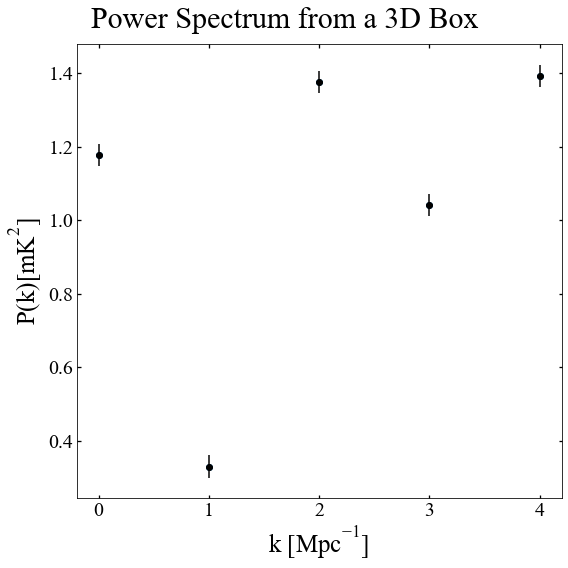

<function __main__.power_spectra_plot(input_k, fourier_array, start, end, sigma)>

In [19]:
generate_pk_3D(4, 5, 0.03)

### Ask Jacob to give me 5 boxes of the 21cm Brightness Temperature that are at different ionization fractions
### Plot some boxes to visualize and also plot the power spectrum
### Rescaling of the image (do in final plotting stage)
$$\frac{k^{3}P(k)}{2\pi^{2}}$$

In [20]:
"""
Description: Python script to access 21cmFAST brightness-temperature boxes 
located in .h5 file format.
"""

import h5py
import numpy as np

hf = h5py.File('HII_DIM_128_BOX_LEN_192_5_boxes_z5.75-9.50.h5', 'r')

redshifts = hf['redshifts'][:]
random_seed = hf['random_seeds'][:]
btemp_boxes = hf['brightness_temp_boxes'][:]

hf.close()

print('Random seed:', random_seed)
print('Redshifts:', redshifts)
print('Ionized fractions:', [np.round(1.0-(btemp_boxes[i] > 0).mean(),3) for i in range(btemp_boxes.shape[0])])

Random seed: [50]
Redshifts: [5.75 6.5  7.5  8.5  9.5 ]
Ionized fractions: [0.956, 0.815, 0.505, 0.257, 0.128]


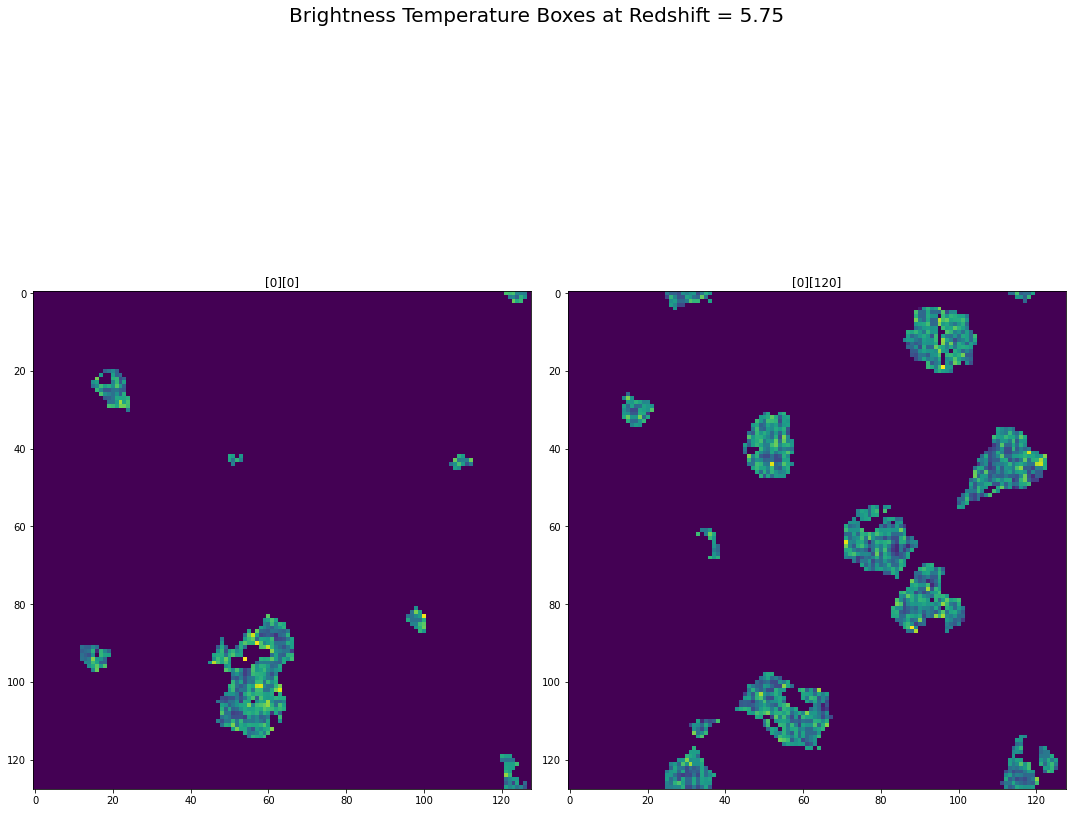

In [21]:
#Displaying Multiple Figures at Once for Comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 15))

ax1.imshow(btemp_boxes[0][0])
ax1.set_title("[0][0]")

ax2.imshow(btemp_boxes[0][120])
ax2.set_title("[0][120]")

plt.suptitle("Brightness Temperature Boxes at Redshift = 5.75", size = 20)
plt.tight_layout()
plt.show()

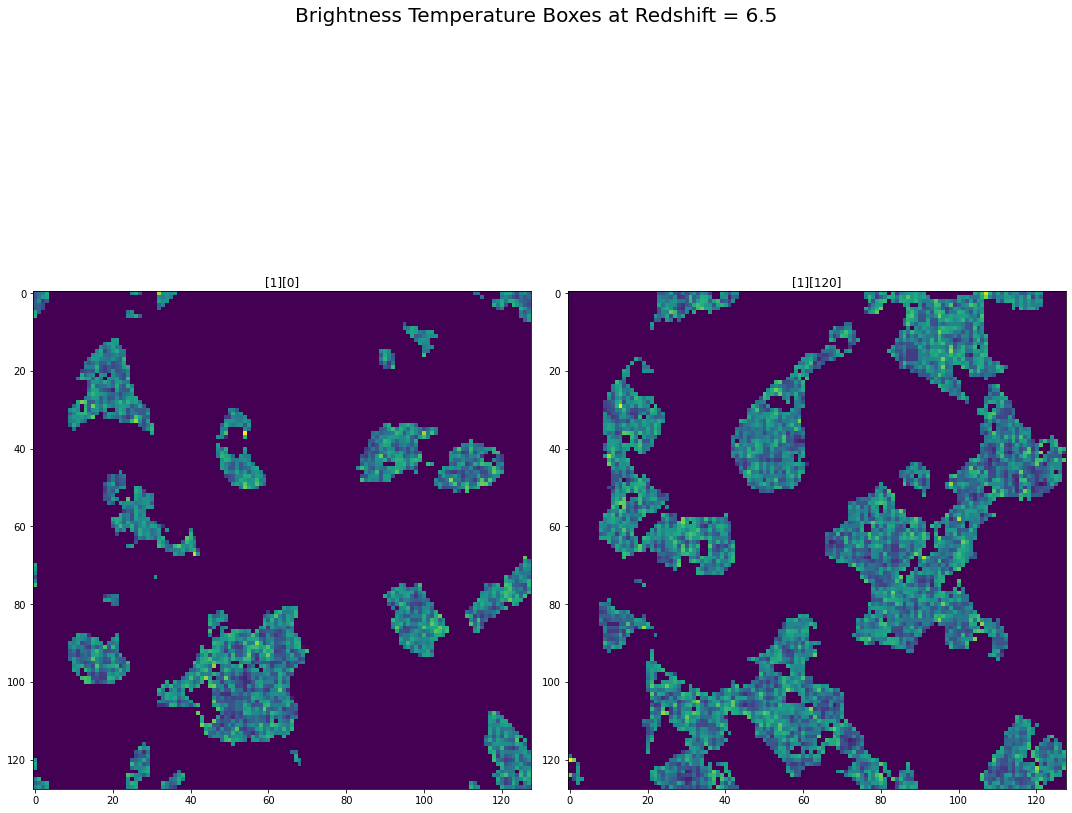

In [22]:
#Displaying Multiple Figures at Once for Comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 15))

ax1.imshow(btemp_boxes[1][0])
ax1.set_title("[1][0]")

ax2.imshow(btemp_boxes[1][120])
ax2.set_title("[1][120]")

plt.suptitle("Brightness Temperature Boxes at Redshift = 6.5", size = 20)
plt.tight_layout()
plt.show()

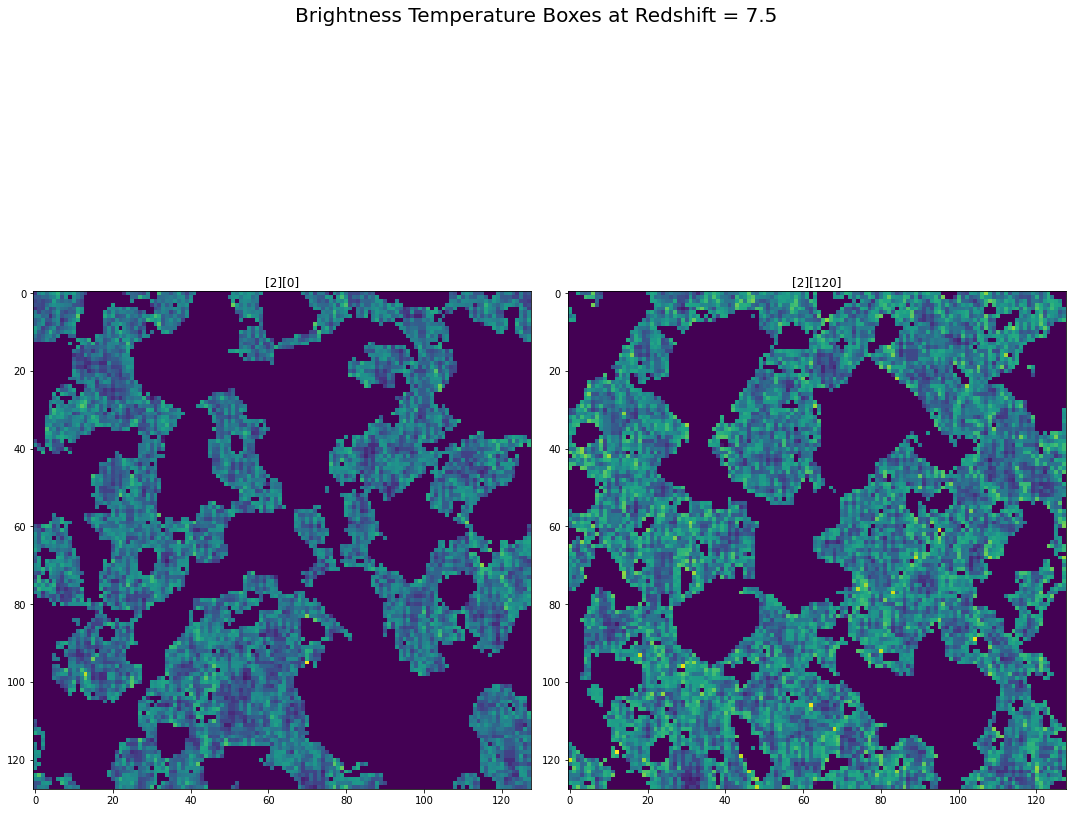

In [23]:
#Displaying Multiple Figures at Once for Comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 15))

ax1.imshow(btemp_boxes[2][0])
ax1.set_title("[2][0]")

ax2.imshow(btemp_boxes[2][120])
ax2.set_title("[2][120]")

plt.suptitle("Brightness Temperature Boxes at Redshift = 7.5", size = 20)
plt.tight_layout()
plt.show()

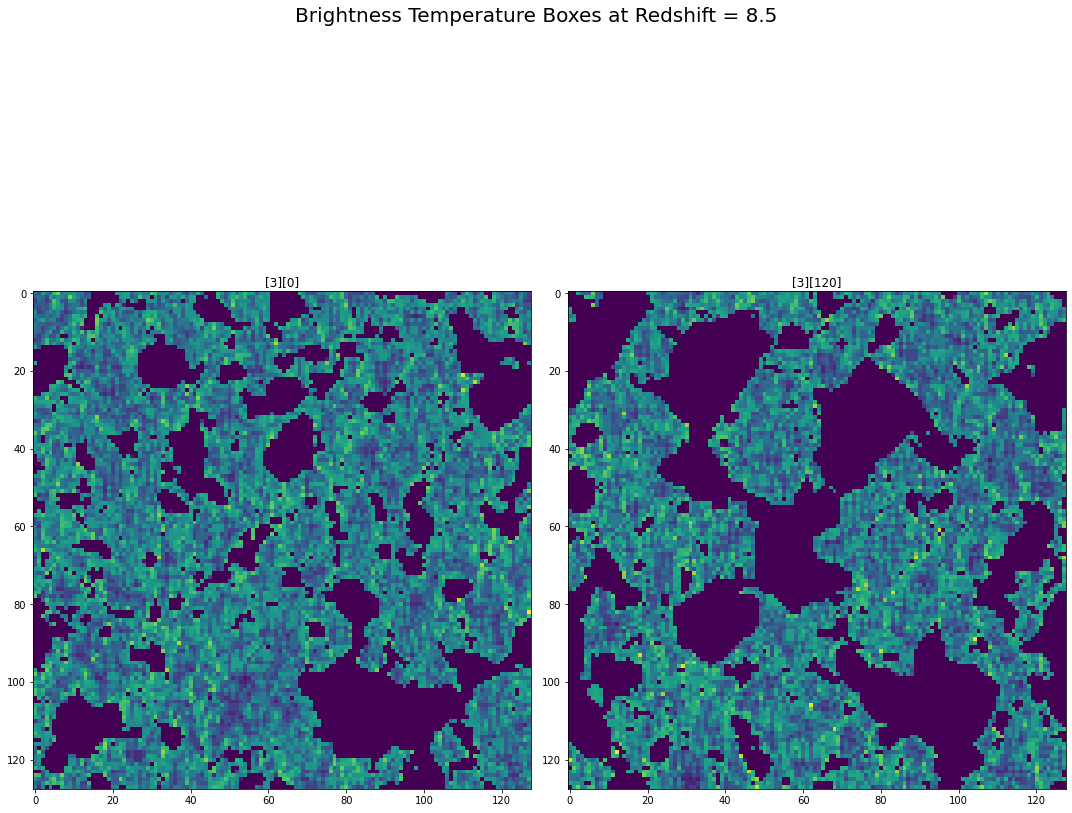

In [24]:
#Displaying Multiple Figures at Once for Comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 15))

ax1.imshow(btemp_boxes[3][0])
ax1.set_title("[3][0]")

ax2.imshow(btemp_boxes[2][120])
ax2.set_title("[3][120]")

plt.suptitle("Brightness Temperature Boxes at Redshift = 8.5", size = 20)
plt.tight_layout()
plt.show()

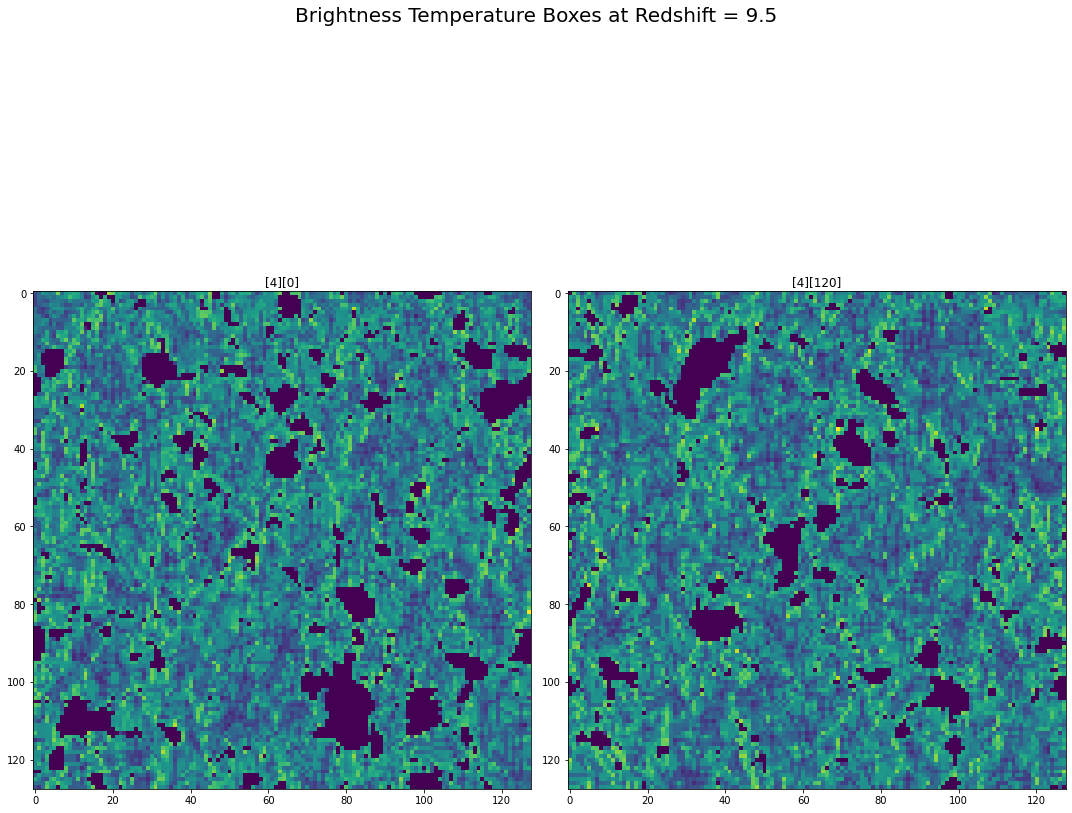

In [25]:
#Displaying Multiple Figures at Once for Comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 15))

ax1.imshow(btemp_boxes[4][0])
ax1.set_title("[4][0]")

ax2.imshow(btemp_boxes[4][120])
ax2.set_title("[4][120]")

plt.suptitle("Brightness Temperature Boxes at Redshift = 9.5", size = 20)
plt.tight_layout()
plt.show()

In [26]:
#creating the power spectra plot
def power_spectra_plot_rescaled(input_k, fourier_array, start, end, sigma):
    
    #getting the average fourier value for the chosen k range
    avg_values = avg_corresponding_values(input_k, fourier_array, start, end)
    print(avg_values)
    
    #rescaling the y-axis
    rescaled_values  = (np.power(start,3) * avg_values)/(2*np.pi**2)
    
    #list of integers from our chosen range values
    #will be the labels for the x-axis
    range_values = list(range(len(start)))
    
    plt.figure(figsize = (8,8))
    plt.plot(range_values, rescaled_values)
    
    #plot specifications
    plt.xlabel("$k$", size = 25)
    plt.ylabel(r"$\frac{k^3*P(k)}{2*\pi^2}$", size = 25)
    plt.tick_params(bottom=True, top=True, left=True, right=True, labelsize = 20)
    #plt.errorbar(range_values, rescaled_values, yerr=sigma, fmt='o', color = 'black')
    plt.suptitle("Power Spectrum from a 3D Box", size = 30)
    plt.tight_layout()
    
    plt.show()

In [27]:
#Changing a Few things for inputting real data

def generate_pk_3D (toy_box, npix, num_bins, sigma):
    
    #fourier transforming box (shifts included)
    k_box = cosmo_transform(toy_box)
    
    #squaring values to find amplitude array
    amplitude = np.abs(k_box)**2
    
    #dividing by original volume of box
    Volume = (npix)**3
    
    #getting the power spectra
    P_k = (amplitude/Volume)
    
    #creating frequency arrays
    #THIS IS THE K_X ARRAY
    k_x = kx_frequency_array(npix)
    #THIS IS THE K_Y ARRAY
    k_y = ky_frequency_array(npix)
    #THIS IS THE K_Z ARRAY
    k_z = kz_frequency_array(npix)
    #creating an array matching our toy box array
    kfreq3D = np.meshgrid(k_x, k_y, k_z, indexing="ij")
    
    #normalisation factor
    #finding distance between pixels
    k_values = np.sqrt(kfreq3D[0]**2 + kfreq3D[1]**2 + kfreq3D[2]**2)

    #finding the maximum value of the k array
    max_k = np.max(k_values)
    
    #defining the starting and ending arrays
    start, end = create_bins(max_k, num_bins)
    print(start)
    print(end)
    
    #finding the element positions of the k-array using our given
    #k value ranges
    rings = find_element_positions(k_values, start, end)
    
    #getting the corresponding fourier array values given positions
    co_values = get_corresponding_values(k_values, P_k, start, end)
    
    #finding the average of all of these values at each index of 2D array
    averages = avg_corresponding_values(k_values, P_k, start, end)
   
    #creating the power_spectra plot
    power_spectra_plot_rescaled(k_values, P_k, start, end, sigma)
    
    return power_spectra_plot_rescaled

In [28]:
box_1 = btemp_boxes[0]
print(box_1.shape)
print(redshifts[0])

(128, 128, 128)
5.75


[0.0, 0.21765592370810613, 0.43531184741621226, 0.6529677711243184, 0.8706236948324245, 1.0882796185405306, 1.3059355422486367, 1.5235914659567429, 1.741247389664849, 1.9589033133729552, 2.176559237081061, 2.3942151607891673, 2.6118710844972735, 2.8295270082053796, 3.0471829319134858, 3.264838855621592, 3.482494779329698, 3.7001507030378042, 3.9178066267459104, 4.135462550454016, 4.353118474162122, 4.570774397870228, 4.788430321578335, 5.006086245286441, 5.223742168994547]
[0.21765592370810613, 0.43531184741621226, 0.6529677711243184, 0.8706236948324245, 1.0882796185405306, 1.3059355422486367, 1.5235914659567429, 1.741247389664849, 1.9589033133729552, 2.176559237081061, 2.3942151607891673, 2.6118710844972735, 2.8295270082053796, 3.0471829319134858, 3.264838855621592, 3.482494779329698, 3.7001507030378042, 3.9178066267459104, 4.135462550454016, 4.353118474162122, 4.570774397870228, 4.788430321578335, 5.006086245286441, 5.223742168994547, 5.441398092702653]
[9722.376707716425, 1324.01831

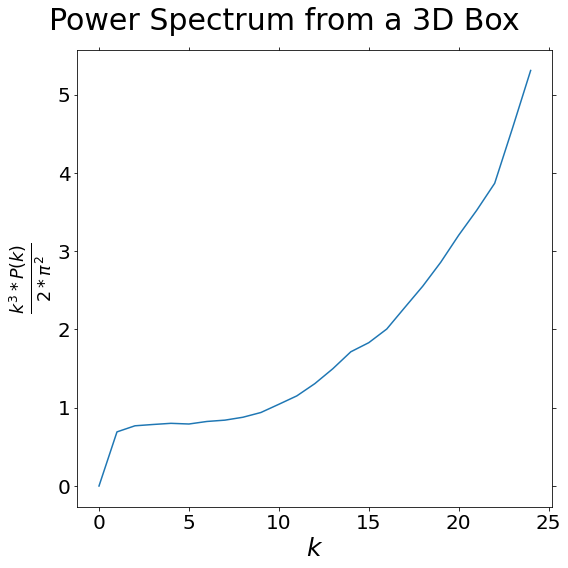

<function __main__.power_spectra_plot_rescaled(input_k, fourier_array, start, end, sigma)>

In [29]:
generate_pk_3D(box_1, 128, 25, 0.03)

In [30]:
box_2 = btemp_boxes[1]
print(box_2.shape)
print(redshifts[1])

(128, 128, 128)
6.5


[0.0, 0.21765592370810613, 0.43531184741621226, 0.6529677711243184, 0.8706236948324245, 1.0882796185405306, 1.3059355422486367, 1.5235914659567429, 1.741247389664849, 1.9589033133729552, 2.176559237081061, 2.3942151607891673, 2.6118710844972735, 2.8295270082053796, 3.0471829319134858, 3.264838855621592, 3.482494779329698, 3.7001507030378042, 3.9178066267459104, 4.135462550454016, 4.353118474162122, 4.570774397870228, 4.788430321578335, 5.006086245286441, 5.223742168994547]
[0.21765592370810613, 0.43531184741621226, 0.6529677711243184, 0.8706236948324245, 1.0882796185405306, 1.3059355422486367, 1.5235914659567429, 1.741247389664849, 1.9589033133729552, 2.176559237081061, 2.3942151607891673, 2.6118710844972735, 2.8295270082053796, 3.0471829319134858, 3.264838855621592, 3.482494779329698, 3.7001507030378042, 3.9178066267459104, 4.135462550454016, 4.353118474162122, 4.570774397870228, 4.788430321578335, 5.006086245286441, 5.223742168994547, 5.441398092702653]
[100915.82231520822, 6337.9312

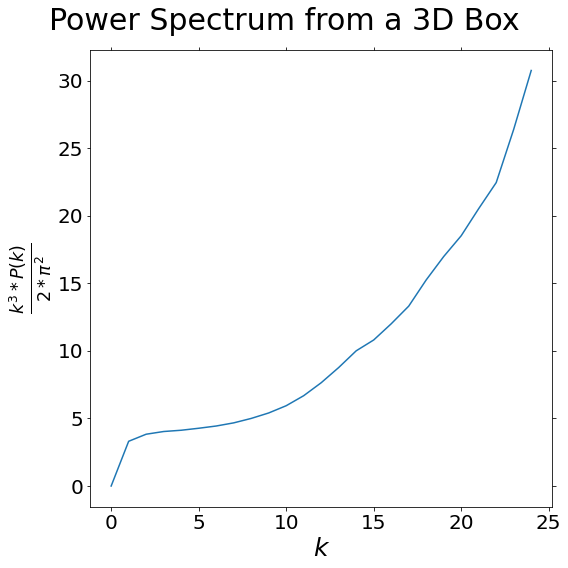

<function __main__.power_spectra_plot_rescaled(input_k, fourier_array, start, end, sigma)>

In [31]:
generate_pk_3D(box_2, 128, 25, 0.03)

In [32]:
box_3 = btemp_boxes[2]
print(box_3.shape)
print(redshifts[2])

(128, 128, 128)
7.5


[0.0, 0.21765592370810613, 0.43531184741621226, 0.6529677711243184, 0.8706236948324245, 1.0882796185405306, 1.3059355422486367, 1.5235914659567429, 1.741247389664849, 1.9589033133729552, 2.176559237081061, 2.3942151607891673, 2.6118710844972735, 2.8295270082053796, 3.0471829319134858, 3.264838855621592, 3.482494779329698, 3.7001507030378042, 3.9178066267459104, 4.135462550454016, 4.353118474162122, 4.570774397870228, 4.788430321578335, 5.006086245286441, 5.223742168994547]
[0.21765592370810613, 0.43531184741621226, 0.6529677711243184, 0.8706236948324245, 1.0882796185405306, 1.3059355422486367, 1.5235914659567429, 1.741247389664849, 1.9589033133729552, 2.176559237081061, 2.3942151607891673, 2.6118710844972735, 2.8295270082053796, 3.0471829319134858, 3.264838855621592, 3.482494779329698, 3.7001507030378042, 3.9178066267459104, 4.135462550454016, 4.353118474162122, 4.570774397870228, 4.788430321578335, 5.006086245286441, 5.223742168994547, 5.441398092702653]
[610171.9624606611, 15530.3511

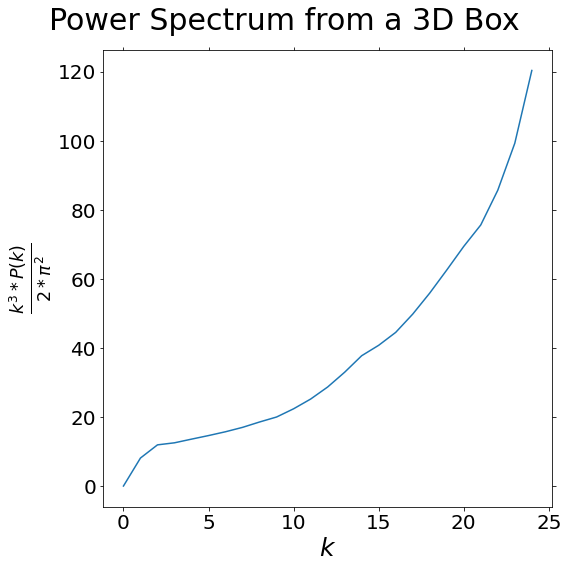

<function __main__.power_spectra_plot_rescaled(input_k, fourier_array, start, end, sigma)>

In [33]:
generate_pk_3D(box_3, 128, 25, 0.03)

In [34]:
box_4 = btemp_boxes[3]
print(box_4.shape)
print(redshifts[3])

(128, 128, 128)
8.5


[0.0, 0.21765592370810613, 0.43531184741621226, 0.6529677711243184, 0.8706236948324245, 1.0882796185405306, 1.3059355422486367, 1.5235914659567429, 1.741247389664849, 1.9589033133729552, 2.176559237081061, 2.3942151607891673, 2.6118710844972735, 2.8295270082053796, 3.0471829319134858, 3.264838855621592, 3.482494779329698, 3.7001507030378042, 3.9178066267459104, 4.135462550454016, 4.353118474162122, 4.570774397870228, 4.788430321578335, 5.006086245286441, 5.223742168994547]
[0.21765592370810613, 0.43531184741621226, 0.6529677711243184, 0.8706236948324245, 1.0882796185405306, 1.3059355422486367, 1.5235914659567429, 1.741247389664849, 1.9589033133729552, 2.176559237081061, 2.3942151607891673, 2.6118710844972735, 2.8295270082053796, 3.0471829319134858, 3.264838855621592, 3.482494779329698, 3.7001507030378042, 3.9178066267459104, 4.135462550454016, 4.353118474162122, 4.570774397870228, 4.788430321578335, 5.006086245286441, 5.223742168994547, 5.441398092702653]
[1589334.327195626, 16015.7542

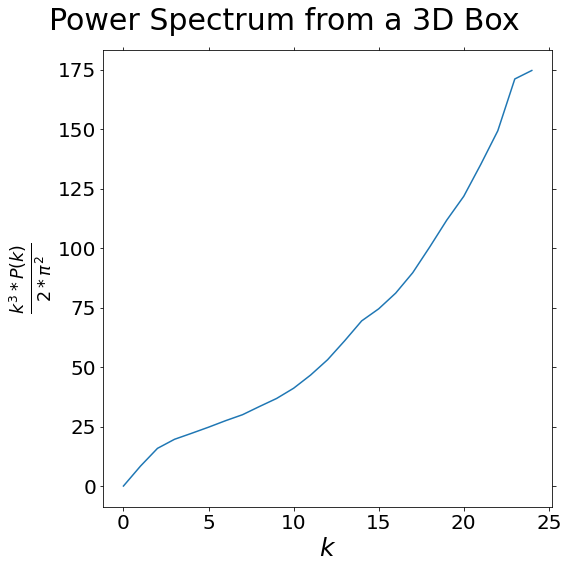

<function __main__.power_spectra_plot_rescaled(input_k, fourier_array, start, end, sigma)>

In [35]:
generate_pk_3D(box_4, 128, 25, 0.03)

In [36]:
box_5 = btemp_boxes[4]
print(box_5.shape)
print(redshifts[4])

(128, 128, 128)
9.5


[0.0, 0.21765592370810613, 0.43531184741621226, 0.6529677711243184, 0.8706236948324245, 1.0882796185405306, 1.3059355422486367, 1.5235914659567429, 1.741247389664849, 1.9589033133729552, 2.176559237081061, 2.3942151607891673, 2.6118710844972735, 2.8295270082053796, 3.0471829319134858, 3.264838855621592, 3.482494779329698, 3.7001507030378042, 3.9178066267459104, 4.135462550454016, 4.353118474162122, 4.570774397870228, 4.788430321578335, 5.006086245286441, 5.223742168994547]
[0.21765592370810613, 0.43531184741621226, 0.6529677711243184, 0.8706236948324245, 1.0882796185405306, 1.3059355422486367, 1.5235914659567429, 1.741247389664849, 1.9589033133729552, 2.176559237081061, 2.3942151607891673, 2.6118710844972735, 2.8295270082053796, 3.0471829319134858, 3.264838855621592, 3.482494779329698, 3.7001507030378042, 3.9178066267459104, 4.135462550454016, 4.353118474162122, 4.570774397870228, 4.788430321578335, 5.006086245286441, 5.223742168994547, 5.441398092702653]
[2714862.4039937463, 9328.6778

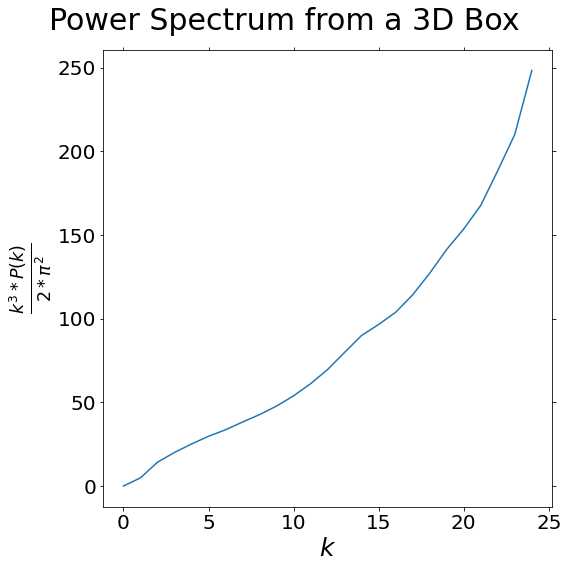

<function __main__.power_spectra_plot_rescaled(input_k, fourier_array, start, end, sigma)>

In [37]:
generate_pk_3D(box_5, 128, 25, 0.03)

## Testing to See if the power spectrum functions "twist"

In [38]:
#creating the power spectra arrays
#does NOT return a plot
def power_spectra_array_rescaled(input_k, fourier_array, start, end, sigma):
    
    #getting the average fourier value for the chosen k range
    avg_values = avg_corresponding_values(input_k, fourier_array, start, end)
    print(avg_values)
    
    #rescaling the y-axis
    rescaled_values  = (np.power(start,3) * avg_values)/(2*np.pi**2)
    
    #list of integers from our chosen range values
    #will be the labels for the x-axis
    range_values = list(range(len(start)))
    
    return range_values, rescaled_values



#Changing a Few things for inputting real data
def generate_pk_3D (toy_box, npix, num_bins, sigma):
    
    #fourier transforming box (shifts included)
    k_box = cosmo_transform(toy_box)
    
    #squaring values to find amplitude array
    amplitude = np.abs(k_box)**2
    
    #dividing by original volume of box
    Volume = (npix)**3
    
    #getting the power spectra
    P_k = (amplitude/Volume)
    
    #creating frequency arrays
    #THIS IS THE K_X ARRAY
    k_x = kx_frequency_array(npix)
    #THIS IS THE K_Y ARRAY
    k_y = ky_frequency_array(npix)
    #THIS IS THE K_Z ARRAY
    k_z = kz_frequency_array(npix)
    #creating an array matching our toy box array
    kfreq3D = np.meshgrid(k_x, k_y, k_z, indexing="ij")
    
    #normalisation factor
    #finding distance between pixels
    k_values = np.sqrt(kfreq3D[0]**2 + kfreq3D[1]**2 + kfreq3D[2]**2)

    #finding the maximum value of the k array
    max_k = np.max(k_values)
    
    #defining the starting and ending arrays
    start, end = create_bins(max_k, num_bins)
    
    #finding the element positions of the k-array using our given
    #k value ranges
    rings = find_element_positions(k_values, start, end)
    
    #getting the corresponding fourier array values given positions
    co_values = get_corresponding_values(k_values, P_k, start, end)
    
    #finding the average of all of these values at each index of 2D array
    averages = avg_corresponding_values(k_values, P_k, start, end)
   
    #creating the power_spectra ARRAYS
    range_values, rescaled_values = power_spectra_array_rescaled(k_values, P_k, start, end, sigma)
    
    return range_values, rescaled_values

In [39]:
#Defining the Power Spectra array values

range1, rescale1 = generate_pk_3D(box_1, 128, 25, 0.03)
range2, rescale2 = generate_pk_3D(box_2, 128, 25, 0.03)
range3, rescale3 = generate_pk_3D(box_3, 128, 25, 0.03)
range4, rescale4 = generate_pk_3D(box_4, 128, 25, 0.03)
range5, rescale5 = generate_pk_3D(box_5, 128, 25, 0.03)

[9722.376707716425, 1324.018315555455, 184.1065441669031, 55.730546605747406, 23.95827904672135, 12.133668904526038, 7.30891759558374, 4.696896943811553, 3.284688197544265, 2.4660676192983555, 1.99914543463902, 1.6562267278636364, 1.4490615177115171, 1.3054300362684232, 1.196285892760513, 1.0387313059963967, 0.93740449286024, 0.8885923238790754, 0.8379689123661901, 0.797801719731915, 0.7667767848004928, 0.7280531648907879, 0.6953058512730885, 0.7204087635138594, 0.7351509848636009]
[100915.82231520822, 6337.931297583276, 917.3389711516504, 285.9903566890832, 123.45769791504094, 65.46448422747105, 39.354612366552765, 26.081587139466418, 18.700839223277708, 14.195916477580752, 11.375146575747099, 9.613454346996921, 8.467773408732137, 7.640806183448269, 6.98023389191811, 6.129942905375659, 5.610483312894271, 5.186191960507914, 5.006394824335883, 4.739798572287418, 4.432043802435049, 4.243586568874513, 4.037099152325792, 4.153912363089845, 4.258204148400526]
[610171.9624606611, 15530.35113

In [40]:
import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)

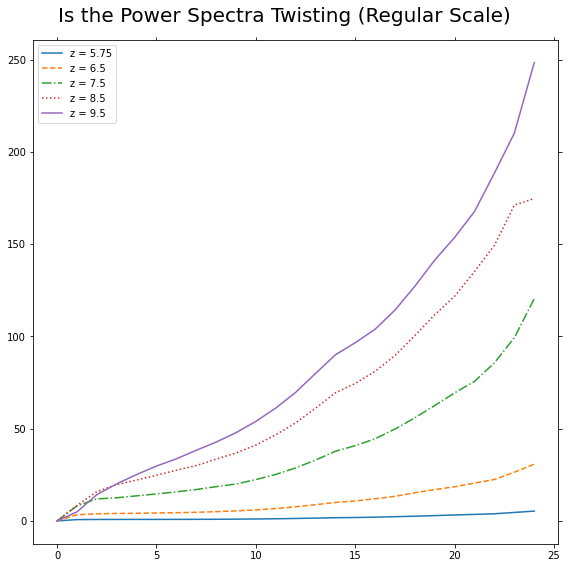

In [41]:
#Creating Plot Comparing Power Spectra
plt.figure(figsize = (8,8))
plt.style.use("fast")

#Plotting all the Power Spectra
plt.plot(range1, rescale1, linestyle = "solid", label = "z = 5.75")
plt.plot(range2, rescale2, linestyle = "dashed", label = "z = 6.5")
plt.plot(range3, rescale3, linestyle = "dashdot", label = "z = 7.5")
plt.plot(range4, rescale4, linestyle = "dotted", label = "z = 8.5")
plt.plot(range5, rescale5, linestyle = "solid", label = "z = 9.5")


plt.suptitle("Is the Power Spectra Twisting (Regular Scale)", size = 20)
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.legend(loc="best")
plt.tight_layout()
plt.show()

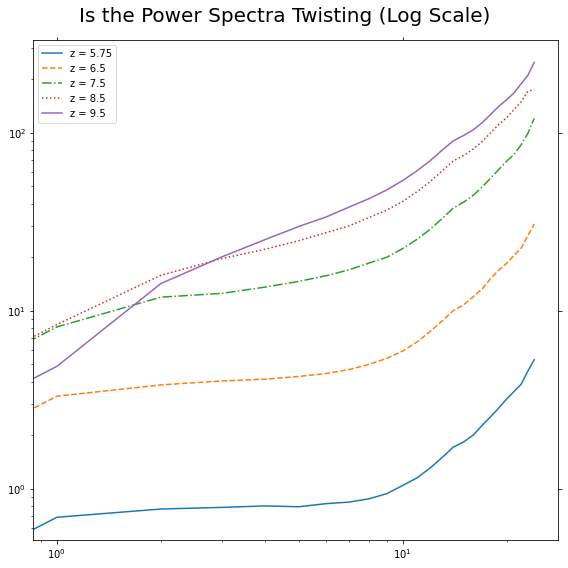

In [42]:
#Creating Plot Comparing Power Spectra
plt.figure(figsize = (8,8))
plt.style.use("fast")

#Plotting all the Power Spectra
plt.plot(range1, rescale1, linestyle = "solid", label = "z = 5.75")
plt.plot(range2, rescale2, linestyle = "dashed", label = "z = 6.5")
plt.plot(range3, rescale3, linestyle = "dashdot", label = "z = 7.5")
plt.plot(range4, rescale4, linestyle = "dotted", label = "z = 8.5")
plt.plot(range5, rescale5, linestyle = "solid", label = "z = 9.5")

plt.yscale("log")
plt.xscale("log")
plt.suptitle("Is the Power Spectra Twisting (Log Scale)", size = 20)
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.legend(loc="best")
plt.tight_layout()
plt.show()

## Meeting 3/21/2023

- fix error bar thing with Monte Carlo
- ~change code so that that power spectra 3D function returns an array instead of a plot~
- ~plot the power spectra at different redshifts on the same plot w/ different colours~
- ~plot power spectra function on log-log scale for both axes~
- ~change bins so that they are log bins, and have equal spacing on your log plot~
- begin writing report intro/experimental methods

In [43]:
#bins are logarithmic to generate start and end binning arrays
#function to generate start and end binning arrays
def create_log_bins(max_val, num_bins):
    """
    Creates logarithmic bins given a maximum value and number of bins.
    """
    #Minimum value of k
    min_val = 0.01  
    
    #Generate logarithmically spaced bins between min_val and max_val
    bins = np.logspace(np.log10(min_val), np.log10(max_val), num=num_bins, endpoint=True)
    print(bins)
    print("Start", bins[:-1])
    print("End", bins[1:])

    
    #Return the edges of the bins
    return bins[:-1], bins[1:]  


#creating the power spectra arrays
#does NOT return a plot
def power_spectra_array_rescaled(input_k, fourier_array, start, end, sigma):
    
    #getting the average fourier value for the chosen k range
    avg_values = avg_corresponding_values(input_k, fourier_array, start, end)
    print("Averages", avg_values)
    
    #rescaling the y-axis
    rescaled_values  = (np.power(start,3) * avg_values)/(2*np.pi**2)
    
    #list of integers from our chosen range values
    #will be the labels for the x-axis
    range_values = list(range(len(start)))
    
    return range_values, rescaled_values

In [44]:
#Changing a Few things for inputting real data

def generate_pk_3D (toy_box, npix, num_bins, sigma):
    
    #fourier transforming box (shifts included)
    k_box = cosmo_transform(toy_box)
    
    #squaring values to find amplitude array
    amplitude = np.abs(k_box)**2
    
    #dividing by original volume of box
    Volume = (npix)**3
    
    #getting the power spectra
    P_k = (amplitude/Volume)
    
    #creating frequency arrays
    #THIS IS THE K_X ARRAY
    k_x = kx_frequency_array(npix)
    #THIS IS THE K_Y ARRAY
    k_y = ky_frequency_array(npix)
    #THIS IS THE K_Z ARRAY
    k_z = kz_frequency_array(npix)
    #creating an array matching our toy box array
    kfreq3D = np.meshgrid(k_x, k_y, k_z, indexing="ij")
    
    #normalisation factor
    #finding distance between pixels
    k_values = np.sqrt(kfreq3D[0]**2 + kfreq3D[1]**2 + kfreq3D[2]**2)

    #finding the maximum value of the k array
    max_k = np.max(k_values)
    
    #defining the starting and ending arrays
    start, end = create_log_bins(max_k, num_bins)
    
    #finding the element positions of the k-array using our given
    #k value ranges
    rings = find_element_positions(k_values, start, end)
    
    #getting the corresponding fourier array values given positions
    co_values = get_corresponding_values(k_values, P_k, start, end)
    
    #finding the average of all of these values at each index of 2D array
    averages = avg_corresponding_values(k_values, P_k, start, end)
   
    #creating the power_spectra ARRAYS
    range_values, rescaled_values = power_spectra_array_rescaled(k_values, P_k, start, end, sigma)
    
    return range_values, rescaled_values

In [45]:
print("Linear Bins")
print("Start",[0.0, 0.21765592370810613, 0.43531184741621226, 0.6529677711243184, 0.8706236948324245, 1.0882796185405306, 1.3059355422486367, 1.5235914659567429, 1.741247389664849, 1.9589033133729552, 2.176559237081061, 2.3942151607891673, 2.6118710844972735, 2.8295270082053796, 3.0471829319134858, 3.264838855621592, 3.482494779329698, 3.7001507030378042, 3.9178066267459104, 4.135462550454016, 4.353118474162122, 4.570774397870228, 4.788430321578335, 5.006086245286441, 5.223742168994547])
print("End",[0.21765592370810613, 0.43531184741621226, 0.6529677711243184, 0.8706236948324245, 1.0882796185405306, 1.3059355422486367, 1.5235914659567429, 1.741247389664849, 1.9589033133729552, 2.176559237081061, 2.3942151607891673, 2.6118710844972735, 2.8295270082053796, 3.0471829319134858, 3.264838855621592, 3.482494779329698, 3.7001507030378042, 3.9178066267459104, 4.135462550454016, 4.353118474162122, 4.570774397870228, 4.788430321578335, 5.006086245286441, 5.223742168994547, 5.441398092702653])
print("Averages",[9722.376707716425, 1324.018315555455, 184.1065441669031, 55.730546605747406, 23.95827904672135, 12.133668904526038, 7.30891759558374, 4.696896943811553, 3.284688197544265, 2.4660676192983555, 1.99914543463902, 1.6562267278636364, 1.4490615177115171, 1.3054300362684232, 1.196285892760513, 1.0387313059963967, 0.93740449286024, 0.8885923238790754, 0.8379689123661901, 0.797801719731915, 0.7667767848004928, 0.7280531648907879, 0.6953058512730885, 0.7204087635138594, 0.7351509848636009])

Linear Bins
Start [0.0, 0.21765592370810613, 0.43531184741621226, 0.6529677711243184, 0.8706236948324245, 1.0882796185405306, 1.3059355422486367, 1.5235914659567429, 1.741247389664849, 1.9589033133729552, 2.176559237081061, 2.3942151607891673, 2.6118710844972735, 2.8295270082053796, 3.0471829319134858, 3.264838855621592, 3.482494779329698, 3.7001507030378042, 3.9178066267459104, 4.135462550454016, 4.353118474162122, 4.570774397870228, 4.788430321578335, 5.006086245286441, 5.223742168994547]
End [0.21765592370810613, 0.43531184741621226, 0.6529677711243184, 0.8706236948324245, 1.0882796185405306, 1.3059355422486367, 1.5235914659567429, 1.741247389664849, 1.9589033133729552, 2.176559237081061, 2.3942151607891673, 2.6118710844972735, 2.8295270082053796, 3.0471829319134858, 3.264838855621592, 3.482494779329698, 3.7001507030378042, 3.9178066267459104, 4.135462550454016, 4.353118474162122, 4.570774397870228, 4.788430321578335, 5.006086245286441, 5.223742168994547, 5.441398092702653]
Averages

In [46]:
#Defining the Power Spectra array values

range1, rescale1 = generate_pk_3D(box_1, 128, 8, 0.03)
range2, rescale2 = generate_pk_3D(box_2, 128, 8, 0.03)
range3, rescale3 = generate_pk_3D(box_3, 128, 8, 0.03)
range4, rescale4 = generate_pk_3D(box_4, 128, 8, 0.03)
range5, rescale5 = generate_pk_3D(box_5, 128, 8, 0.03)

[0.01 0.02 0.06 0.15 0.37 0.9  2.21 5.44]
Start [0.01 0.02 0.06 0.15 0.37 0.9  2.21]
End [0.02 0.06 0.15 0.37 0.9  2.21 5.44]
Averages [0, 31194.27479400452, 11822.975335698866, 2546.5732816033765, 118.96764505222689, 5.692743662102549, 1.1693506426096214]
[0.01 0.02 0.06 0.15 0.37 0.9  2.21 5.44]
Start [0.01 0.02 0.06 0.15 0.37 0.9  2.21]
End [0.02 0.06 0.15 0.37 0.9  2.21 5.44]
Averages [0, 266889.6613363654, 95751.83141619684, 14087.265097931166, 574.5015822461853, 30.931935107337818, 6.84049028602111]
[0.01 0.02 0.06 0.15 0.37 0.9  2.21 5.44]
Start [0.01 0.02 0.06 0.15 0.37 0.9  2.21]
End [0.02 0.06 0.15 0.37 0.9  2.21 5.44]
Averages [0, 694606.7509354329, 230645.1160198562, 32585.116151848943, 1758.558131242582, 109.24235118146684, 25.65489431061554]
[0.01 0.02 0.06 0.15 0.37 0.9  2.21 5.44]
Start [0.01 0.02 0.06 0.15 0.37 0.9  2.21]
End [0.02 0.06 0.15 0.37 0.9  2.21 5.44]
Averages [0, 441893.85197472404, 131198.00135294563, 26907.999331406256, 2418.103229834812, 190.247842116676

In [47]:
import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)

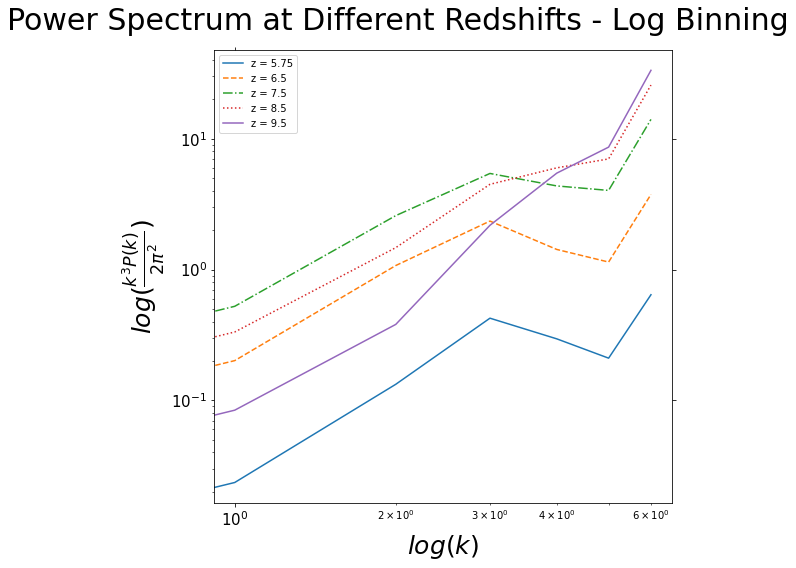

In [48]:
#Creating Plot Comparing Power Spectra
plt.figure(figsize = (8,8))
plt.style.use("fast")

#Plotting all the Power Spectra
plt.plot(range1, rescale1, linestyle = "solid", label = "z = 5.75")
plt.plot(range2, rescale2, linestyle = "dashed", label = "z = 6.5")
plt.plot(range3, rescale3, linestyle = "dashdot", label = "z = 7.5")
plt.plot(range4, rescale4, linestyle = "dotted", label = "z = 8.5")
plt.plot(range5, rescale5, linestyle = "solid", label = "z = 9.5")
    

#Plot specifications
plt.yscale("log")
plt.xscale("log")
plt.xlabel("$log(k)$", size = 25)
plt.ylabel(r"$log(\frac{k^3 P(k)}{2 \pi^2})$", size = 25)
plt.tick_params(bottom=True, top=True, left=True, right=True, labelsize = 20)
plt.suptitle("Power Spectrum at Different Redshifts - Log Binning", size = 30)
plt.tight_layout()
plt.legend(loc = "best")
    
plt.show()